<a href="https://colab.research.google.com/github/SamuelBFG/ga-fading/blob/main/GeneticAlgorithm_CurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity

plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

## Set up directories
paths = ['plots', 
            'plots/gen/', 
        ]
for i in paths:
    if not os.path.exists(i):
        os.makedirs(i)

In [2]:
class DataLoad():
  def __init__(self):
    return
  
  def datasets_AB_2Khz(self):   
    ap_1 = pd.read_csv('/content/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/contentt/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

    return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

  def datasets_AB_1Khz(self):
    ap_1 = pd.read_csv('/content/pathAB_SSF_dB_AP1_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/pathAB_SSF_dB_AP2_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/pathAB_SSF_dB_AP3_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/pathAB_SSF_dB_AP4_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/pathAB_SSF_dB_AP5_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/pathAB_SSF_dB_AP6_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/pathAB_SSF_dB_AP7_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/pathAB_SSF_dB_AP8_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/pathAB_SSF_dB_AP9_downsampled1Khz_win50.txt', sep=" ", header=None)

    return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

  def datasets_BA_2Khz(self):
    ap_1 = pd.read_csv('/content/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

    return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

  def datasets_BA_1Khz(self):
    ap_1 = pd.read_csv('/content/pathBA_SSF_dB_AP1_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('/content/pathBA_SSF_dB_AP2_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('/content/pathBA_SSF_dB_AP3_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('/content/pathBA_SSF_dB_AP4_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('/content/pathBA_SSF_dB_AP5_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('/content/pathBA_SSF_dB_AP6_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('/content/pathBA_SSF_dB_AP7_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('/content/pathBA_SSF_dB_AP8_downsampled1Khz_win50.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('/content/pathBA_SSF_dB_AP9_downsampled1Khz_win50.txt', sep=" ", header=None)

    return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
pathAB_dB = pd.DataFrame()
pathAB_dB['AP1'], pathAB_dB['AP2'], pathAB_dB['AP3'], pathAB_dB['AP4'], pathAB_dB['AP5'], pathAB_dB['AP6'], pathAB_dB['AP7'], pathAB_dB['AP8'], pathAB_dB['AP9'] = DataLoad().datasets_AB_1Khz() 


pathAB_linear = {}
pathAB_linear['AP1'] = np.power(10, pathAB_dB['AP1']/20)
pathAB_linear['AP2'] = np.power(10, pathAB_dB['AP2']/20)
pathAB_linear['AP3'] = np.power(10, pathAB_dB['AP3']/20)
pathAB_linear['AP4'] = np.power(10, pathAB_dB['AP4']/20)
pathAB_linear['AP5'] = np.power(10, pathAB_dB['AP5']/20)
pathAB_linear['AP6'] = np.power(10, pathAB_dB['AP6']/20)
pathAB_linear['AP7'] = np.power(10, pathAB_dB['AP7']/20)
pathAB_linear['AP8'] = np.power(10, pathAB_dB['AP8']/20)
pathAB_linear['AP9'] = np.power(10, pathAB_dB['AP9']/20)
pathAB_linear = pd.DataFrame(pathAB_linear)

######################
#### LOAD PATH BA ####
######################
pathBA_dB = pd.DataFrame()
pathBA_dB['AP1'], pathBA_dB['AP2'], pathBA_dB['AP3'], pathBA_dB['AP4'], pathBA_dB['AP5'], pathBA_dB['AP6'], pathBA_dB['AP7'], pathBA_dB['AP8'], pathBA_dB['AP9'] = DataLoad().datasets_BA_1Khz()


pathBA_linear = {}
pathBA_linear['AP1'] = np.power(10, pathBA_dB['AP1']/20)
pathBA_linear['AP2'] = np.power(10, pathBA_dB['AP2']/20)
pathBA_linear['AP3'] = np.power(10, pathBA_dB['AP3']/20)
pathBA_linear['AP4'] = np.power(10, pathBA_dB['AP4']/20)
pathBA_linear['AP5'] = np.power(10, pathBA_dB['AP5']/20)
pathBA_linear['AP6'] = np.power(10, pathBA_dB['AP6']/20)
pathBA_linear['AP7'] = np.power(10, pathBA_dB['AP7']/20)
pathBA_linear['AP8'] = np.power(10, pathBA_dB['AP8']/20)
pathBA_linear['AP9'] = np.power(10, pathBA_dB['AP9']/20)
pathBA_linear = pd.DataFrame(pathBA_linear)

print('Path AB (dB) Statistics:')
display(pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,10697.000000,8812.000000,10656.000000,9927.000000,9395.000000,8645.000000,9343.000000,9281.000000,9125.000000
mean,-0.679144,-0.678685,-0.891395,-0.618300,-0.638215,-0.955131,-0.906079,-0.808394,-0.980556
std,3.755317,3.727851,4.148268,3.481536,3.523801,4.381667,4.206115,3.948882,4.360623
min,-23.270000,-25.995000,-29.257000,-23.439000,-26.626000,-28.295000,-24.263000,-23.097000,-25.785000
25%,-1.992900,-2.078275,-2.785375,-1.758650,-1.908150,-3.072200,-2.969000,-2.730100,-3.206400
50%,0.018903,-0.096474,-0.152590,-0.033933,-0.029619,-0.132410,-0.155200,-0.187850,-0.247910
75%,1.533700,1.476525,1.818025,1.298050,1.420300,1.953700,1.949350,1.754300,1.991900
max,8.057100,9.495200,8.997100,10.364000,9.217000,8.636300,9.117800,8.691000,8.649700


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,10697.000000,8812.000000,10656.000000,9927.000000,9395.000000,8645.000000,9343.000000,9281.000000,9125.000000
mean,0.998028,0.999134,0.994438,0.996579,0.996164,0.998017,0.996402,0.996772,0.996079
std,0.344062,0.357581,0.398839,0.334285,0.337584,0.420995,0.407807,0.390212,0.428052
min,0.068628,0.050148,0.034447,0.067305,0.046634,0.038481,0.061214,0.070008,0.051375
25%,0.794978,0.787202,0.725657,0.816709,0.802773,0.702085,0.710477,0.730289,0.691321
50%,1.002179,0.988955,0.982586,0.996101,0.996596,0.984871,0.982291,0.978605,0.971862
75%,1.193122,1.185294,1.232824,1.161188,1.177647,1.252233,1.251606,1.223813,1.257752
max,2.528454,2.983733,2.817442,3.297615,2.889682,2.702807,2.856867,2.719882,2.706980


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,10427.000000,10187.000000,9739.000000,10197.000000,9864.000000,10114.000000,10406.000000,9979.000000,10114.000000
mean,-1.074985,-1.082196,-1.108130,-1.141227,-1.066528,-1.169384,-1.085920,-1.050910,-1.141020
std,4.611840,4.606842,4.676193,4.776027,4.585556,4.827644,4.644380,4.601888,4.805922
min,-23.208000,-24.229000,-23.415000,-28.406000,-27.824000,-29.505000,-24.908000,-23.740000,-25.947000
25%,-3.572900,-3.676300,-3.706050,-3.604800,-3.436825,-3.819825,-3.425175,-3.451000,-3.753000
50%,-0.260680,-0.365460,-0.342420,-0.273940,-0.290850,-0.376360,-0.311915,-0.233700,-0.330355
75%,2.165200,2.217050,2.230550,2.215100,2.191550,2.335500,2.088425,2.116250,2.333100
max,10.430000,10.245000,10.232000,9.811200,9.336400,9.470100,9.988000,9.302400,9.662200


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,10427.000000,10187.000000,9739.000000,10197.000000,9864.000000,10114.000000,10406.000000,9979.000000,10114.000000
mean,0.997510,0.998304,0.998336,0.996081,0.995027,0.997682,0.996491,0.998782,0.999820
std,0.449814,0.459462,0.463209,0.454875,0.437166,0.470313,0.448310,0.446857,0.467674
min,0.069119,0.061454,0.067492,0.037993,0.040626,0.033477,0.056833,0.065013,0.050425
25%,0.662758,0.654915,0.652676,0.660328,0.673223,0.644182,0.674126,0.672125,0.649157
50%,0.970434,0.958798,0.961344,0.968954,0.967069,0.957595,0.964727,0.973453,0.962681
75%,1.283099,1.290781,1.292789,1.290491,1.286997,1.308504,1.271807,1.275888,1.308142
max,3.322768,3.252745,3.247880,3.094283,2.929679,2.975124,3.157912,2.918233,3.041655


In [3]:
np.power(10,pathAB_dB['AP1']/20)

0        1.000000
1        0.997478
2        1.009660
3        1.006576
4        0.994963
           ...   
10692    1.071257
10693    1.104048
10694    1.053684
10695    1.022874
10696    1.000000
Name: AP1, Length: 10697, dtype: float64

In [4]:
pathAB_linear['AP1']

0        1.000000
1        0.997478
2        1.009660
3        1.006576
4        0.994963
           ...   
10692    1.071257
10693    1.104048
10694    1.053684
10695    1.022874
10696    1.000000
Name: AP1, Length: 10697, dtype: float64

In [28]:
print(mat_8['ssf_t_12_linear'])

[1.         0.99747842 1.00965953 ... 1.05368454 1.02287336 1.        ]


In [5]:
### PARAMETERS
nMaxGen = 50
nPopulation = 1000
savePlots = True
showPlots = False
fitnessType = 'MSE'
nExtractedSamples = 81

In [154]:
## Auxiliary Methods

def getDensityEstimationSamples(linear_data, nExtractedSamples):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(min(linear_data), max(linear_data), nExtractedSamples)

  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  Vecpoints = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  logkde = kde.score_samples(Vecpoints)

  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Vecpoints), np.exp(logkde),c='magenta')
  plt.ylabel('Density')
  plt.xlabel('dB')
  plt.grid()
  plt.show()
  return Vecpoints, np.exp(logkde)

def computePDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''

  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
          # /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  # R = r / r_hat
  B = (r / np.sqrt(omega))**(mu)
  # B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  # C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD

def fitness(fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  '''
  global X
  global Y

  if fitnessType == 'MSE':
    y_pred = computePDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = computePDF(X, kappa, mu, omega)/np.sum(computePDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def geneticAlgorithm(X, Y):
  '''
  Evolutionary Loop
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 100), # kappa
                        random.uniform(0.1, 1.0), # mu
                        random.uniform(0.1, 2))) # r_hat^2

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness(fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    print(f'=== Generation: {i} === ')
    print(f'Fitness: {rankedSolutions[0][0]}')
    print('Best individual:')
    print(f'Kappa: {rankedSolutions[0][1][0]}')
    print(f'Mu: {rankedSolutions[0][1][1]}')
    print(f'Omega: {rankedSolutions[0][1][2]}\n')

    plt.figure(figsize=((10,7)))
    plt.plot(20*np.log10(X), computePDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), label='Predicted')
    plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    plt.plot(20*np.log10(X), computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657), label='Nidhi\'s MLE')
    plt.title(f'=== Generation: {i} === ')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'$\rho=r/\hat{r}$')
    plt.ylabel('pdf')
    if savePlots: 
      plt.savefig(f'plots/gen/gen_{i}.png')
    
    if showPlots:
      plt.show()
      plt.clf()
    else: 
      plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Stop Criterion: Fitness > 150 (TRIAL AND ERROR)
    # if rankedSolutions[0][0] > 152.8:
    #   print('='*10+'\n'+'Stopped by fitness criteria!\n'+'='*10+'\n')
    #   # print('='*10)
    #   # print('Stopped by fitness criteria!')
    #   # print('='*10)
    #   print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
    #   print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
    #   break

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

      return bestParams[0],bestParams[1],bestParams[2]

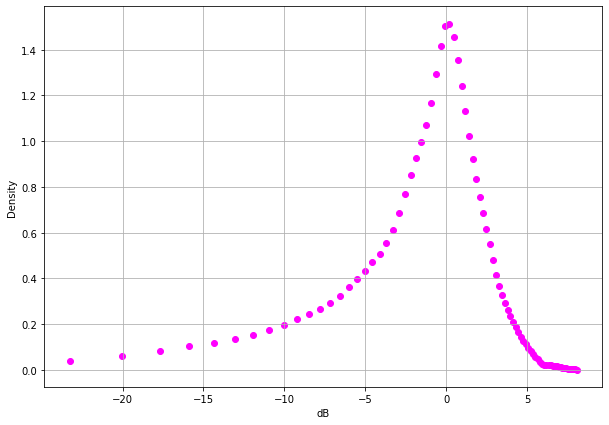

In [7]:
X, Y = getDensityEstimationSamples(pathAB_linear['AP1'].dropna(), nExtractedSamples)

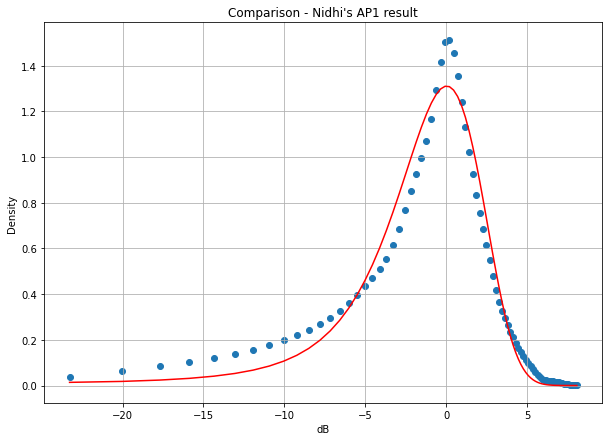

In [8]:
plt.figure(figsize=(10,7))
plt.plot(20*np.log10(X),computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657),'r') # Nidhi's MLE result
plt.title('Comparison - Nidhi\'s AP1 result')
plt.scatter(20*np.log10(X),Y) # True samples
plt.grid()
plt.xlabel('dB')
plt.ylabel('Density')
plt.show()

## AP 1 - Fitness: MSE

In [9]:
kappa_hat, mu_hat, omega_hat = geneticAlgorithm(X,Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


=== Generation: 0 === 
Fitness: nan
Best individual:
Kappa: 93.58349573487794
Mu: 0.876572149363814
Omega: 0.1308206742835776



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


=== Generation: 1 === 
Fitness: 148.60933674373493
Best individual:
Kappa: 39.76525784478793
Mu: 0.14389528402183469
Omega: 1.1062264030846134

=== Generation: 2 === 
Fitness: 151.95891128321094
Best individual:
Kappa: 48.95143509552673
Mu: 0.12565227857743363
Omega: 1.0875537575309564

=== Generation: 3 === 
Fitness: 152.01134968548197
Best individual:
Kappa: 23.827280303738984
Mu: 0.24086383349849813
Omega: 1.085836153186672

=== Generation: 4 === 
Fitness: 152.409713564729
Best individual:
Kappa: 28.61425822768476
Mu: 0.20602701212236613
Omega: 1.0866224227908126

=== Generation: 5 === 
Fitness: 152.42557051683698
Best individual:
Kappa: 22.90635018601426
Mu: 0.25132436417042847
Omega: 1.0943753756675838

=== Generation: 6 === 
Fitness: 152.54223047082908
Best individual:
Kappa: 24.797156173369995
Mu: 0.23238144585233225
Omega: 1.0908871319023585

=== Generation: 7 === 
Fitness: 152.51884288995996
Best individual:
Kappa: 23.371903998767277
Mu: 0.24747684742751988
Omega: 1.0916603409

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [10]:
pVec1 = Y/np.sum(Y)
pVec2 = computePDF(X, kappa_hat, mu_hat, omega_hat)/np.sum(computePDF(X, kappa_hat, mu_hat, omega_hat))


KLD_1 = kldiv(pVec1, pVec2)
KLD_2 = kldiv(pVec2, pVec1)

print('Genetic Algorithm - Resistor-Average Distance:',RAD(KLD_1, KLD_2))

Genetic Algorithm - Resistor-Average Distance: 0.023554531201711776


In [11]:
pVec1 = Y/np.sum(Y)
pVec2 = computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657)/np.sum(computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657))


KLD_1 = kldiv(pVec1, pVec2)
KLD_2 = kldiv(pVec2, pVec1)

print('MLE - Resistor-Average Distance:',RAD(KLD_1, KLD_2))

MLE - Resistor-Average Distance: 0.023563305647376357


In [12]:
kappa_hat, mu_hat, omega_hat

(24.91306037986116, 0.23353308248575336, 1.0920201105675933)

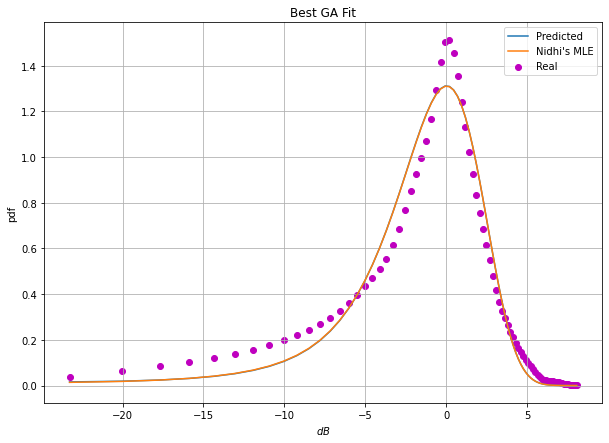

In [13]:
plt.figure(figsize=((10,7)))
plt.plot(20*np.log10(X), computePDF(X, kappa_hat, mu_hat, omega_hat), label='Predicted')
plt.scatter(20*np.log10(X), Y, color='m', label='Real')
plt.plot(20*np.log10(X), computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657), label='Nidhi\'s MLE')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'$dB$')
plt.ylabel('pdf')
plt.show()

## AP 1 - Fitness: RAD

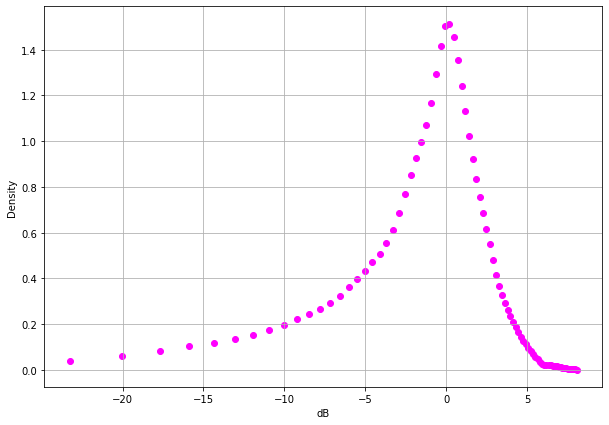

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


=== Generation: 0 === 
Fitness: nan
Best individual:
Kappa: 80.16450309506932
Mu: 0.9223453350273931
Omega: 0.5488888946829121



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


=== Generation: 1 === 
Fitness: nan
Best individual:
Kappa: 63.90039967600662
Mu: 0.7932556518319976
Omega: 0.10338993806457925



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


=== Generation: 2 === 
Fitness: 67.1668224351319
Best individual:
Kappa: 11.327113648372642
Mu: 0.3811811183403669
Omega: 1.0687572996320787



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


=== Generation: 3 === 
Fitness: 69.02795610967098
Best individual:
Kappa: 33.84184015083697
Mu: 0.12823491508769064
Omega: 1.110974912199114

=== Generation: 4 === 
Fitness: 73.12431883985772
Best individual:
Kappa: 10.575191317371152
Mu: 0.3958208660661084
Omega: 1.1086021685003085

=== Generation: 5 === 
Fitness: 72.61954230661772
Best individual:
Kappa: 23.195354940849874
Mu: 0.19394407626858418
Omega: 1.1102712633235907

=== Generation: 6 === 
Fitness: 73.05117840325036
Best individual:
Kappa: 18.083710233528326
Mu: 0.2480233391704251
Omega: 1.1080453387457372

=== Generation: 7 === 
Fitness: 73.10199913974132
Best individual:
Kappa: 17.050656660053146
Mu: 0.2619403832177044
Omega: 1.1078261718508287

=== Generation: 8 === 
Fitness: 73.11143386590581
Best individual:
Kappa: 16.854259014983377
Mu: 0.2647743064512609
Omega: 1.1078217615483346

=== Generation: 9 === 
Fitness: 73.13841623212944
Best individual:
Kappa: 15.993233989139732
Mu: 0.2787132534637207
Omega: 1.1066231439889451


<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [14]:
fitnessType = 'RAD'
X, Y = getDensityEstimationSamples(pathAB_linear['AP1'].dropna(), nExtractedSamples)
kappa_hat2, mu_hat2, omega_hat2 = geneticAlgorithm(X,Y)

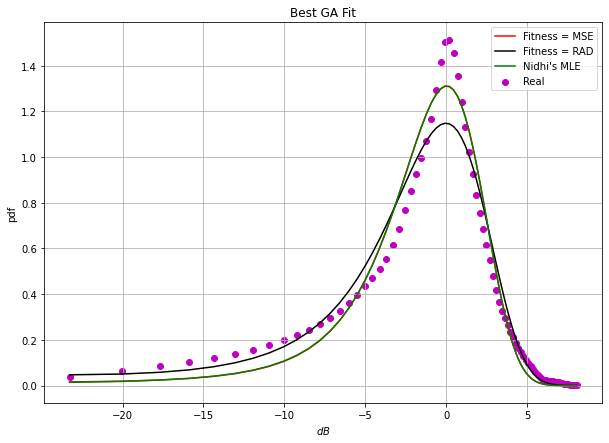

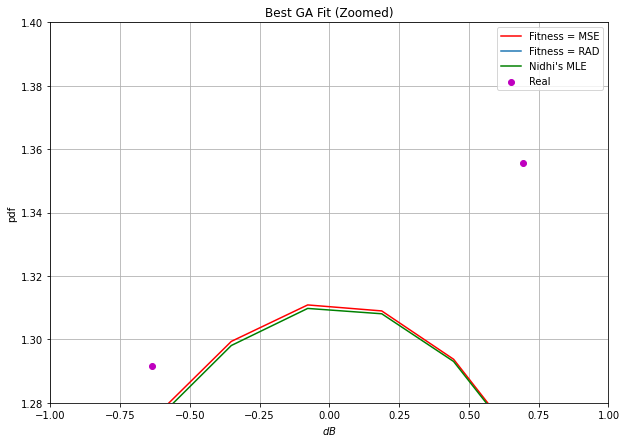

In [15]:
plt.figure(figsize=((10,7)))
plt.plot(20*np.log10(X), computePDF(X, kappa_hat, mu_hat, omega_hat), label='Fitness = MSE', color='r')
plt.plot(20*np.log10(X), computePDF(X, kappa_hat2, mu_hat2, omega_hat2), label='Fitness = RAD', color='k')
plt.scatter(20*np.log10(X), Y, color='m', label='Real')
plt.plot(20*np.log10(X), computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657), label='Nidhi\'s MLE', color='g')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'$dB$')
plt.ylabel('pdf')
plt.show()

plt.figure(figsize=((10,7)))
plt.plot(20*np.log10(X), computePDF(X, kappa_hat, mu_hat, omega_hat), label='Fitness = MSE', color='r')
plt.plot(20*np.log10(X), computePDF(X, kappa_hat2, mu_hat2, omega_hat2), label='Fitness = RAD')
plt.scatter(20*np.log10(X), Y, color='m', label='Real')
plt.plot(20*np.log10(X), computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657), label='Nidhi\'s MLE', color='g')
plt.title(f'Best GA Fit (Zoomed)')
plt.legend()
plt.grid(True)
plt.xlabel(r'$dB$')
plt.ylabel('pdf')
plt.ylim([1.28, 1.4])
plt.xlim([-1, 1])
plt.show()

In [16]:
# Scores - RAD
pVec1 = Y/np.sum(Y)
pVec2 = computePDF(X, kappa_hat, mu_hat, omega_hat)/np.sum(computePDF(X, kappa_hat, mu_hat, omega_hat))
KLD_1 = kldiv(pVec1, pVec2)
KLD_2 = kldiv(pVec2, pVec1)
rad_mse = RAD(KLD_1, KLD_2)

pVec2 = computePDF(X, kappa_hat2, mu_hat2, omega_hat2)/np.sum(computePDF(X, kappa_hat2, mu_hat2, omega_hat2))
KLD_1 = kldiv(pVec1, pVec2)
KLD_2 = kldiv(pVec2, pVec1)
rad_rad = RAD(KLD_1, KLD_2)

pVec2 = computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657)/np.sum(computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657))
KLD_1 = kldiv(pVec1, pVec2)
KLD_2 = kldiv(pVec2, pVec1)
rad_mle = RAD(KLD_1, KLD_2)

rads = {'Methods':['Genetic Algorithm (Fitness = MSE)', 'Genetic Algorithm (Fitness = RAD)', 'Maximum Likelihood Estimator'],
		'Resistor Average Distance':[rad_mse, rad_rad, rad_mle]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df)

,Methods,Resistor Average Distance
0,Genetic Algorithm (Fitness = MSE),0.023555
1,Genetic Algorithm (Fitness = RAD),0.013667
2,Maximum Likelihood Estimator,0.023563


## Working on implementing AIC 

In [107]:
pathAB_dB['AP2'].dropna()

0       0.000000
1      -0.062012
2      -0.139640
3      -0.226960
4      -0.440890
          ...   
8807    3.117000
8808    1.811500
8809    0.767820
8810    0.034334
8811    0.000000
Name: AP2, Length: 8812, dtype: float64

In [106]:
pathAB_linear['AP2'].dropna()

0       1.000000
1       0.992886
2       0.984052
3       0.974209
4       0.950507
          ...   
8807    1.431693
8808    1.231899
8809    1.092423
8810    1.003961
8811    1.000000
Name: AP2, Length: 8812, dtype: float64

In [105]:
20*np.log10(pathAB_linear['AP2'].dropna())

0       0.000000
1      -0.062012
2      -0.139640
3      -0.226960
4      -0.440890
          ...   
8807    3.117000
8808    1.811500
8809    0.767820
8810    0.034334
8811    0.000000
Name: AP2, Length: 8812, dtype: float64

In [104]:
pathAB_dBm = {}
pathAB_dBm['AP2'] = 20*np.log10(pathAB_linear['AP2'].dropna()) + 30
pathAB_dBm['AP2']

0       30.000000
1       29.937988
2       29.860360
3       29.773040
4       29.559110
          ...    
8807    33.117000
8808    31.811500
8809    30.767820
8810    30.034334
8811    30.000000
Name: AP2, Length: 8812, dtype: float64

In [47]:
def dBm2mV(dBm):
  
  mV =  np.power(10, (dBm + 46.9897)/20)
  return mV

In [108]:
data_mV = dBm2mV(pathAB_dBm['AP2'])
data_mV

0        7071.067777
1        7020.764410
2        6958.297613
3        6888.695688
4        6721.102211
            ...     
8807    10123.600533
8808     8710.839263
8809     7724.600004
8810     7099.073947
8811     7071.067777
Name: AP2, Length: 8812, dtype: float64

In [114]:
globalmean = np.mean(data_mV)
data_mV = data_mV / globalmean
n = len(data_mV)
K = 3
data_mV

0       1.000867
1       0.993746
2       0.984905
3       0.975053
4       0.951331
          ...   
8807    1.432934
8808    1.232966
8809    1.093370
8810    1.004831
8811    1.000867
Name: AP2, Length: 8812, dtype: float64

In [115]:
np.sum(np.log(computePDF(data_mV, 60.074731198877520, 0.100000000000035, 1.090859130374765)))

-3722.9068617056473

In [116]:
sum = np.sum(np.log(computePDF(data_mV, 60.074731198877520, 0.100000000000035, 1.090859130374765)))
-2*sum + 2*K + (2*K*(K+1))/(n-K-1)

7451.816448206935

In [117]:
sum = np.sum(np.log(computePDF(data_mV, kappa_hat, mu_hat, omega_hat)))
-2*sum + 2*K + (2*K*(K+1))/(n-K-1)

7437.415793872786

In [118]:
sum = np.sum(np.log(computePDF(data_mV, kappa_hat2, mu_hat2, omega_hat2)))
-2*sum + 2*K + (2*K*(K+1))/(n-K-1)

6942.017324079586

In [119]:
data = pd.read_csv('/content/P_dBm_out_LOS_Head_Indoor.txt', sep=" ", header=None)
data = data.dropna(axis=1).transpose().reset_index(drop=True)
data_mv = dBm2mV(data)

global_mean = np.mean(data_mv)
data_mv = data_mv / global_mean
data_mv

,0
0,2.649921
1,2.621534
2,2.621534
3,2.621534
4,2.593451
...,...
181139,0.549958
181140,0.561933
181141,0.549958
181142,0.555913


In [206]:
def fitness(fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  '''
  global Xdata
  global Ydata

  if fitnessType == 'MSE':
    y_pred = computePDF(Xdata, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = computePDF(Xdata, kappa, mu, omega)/np.sum(computePDF(Xdata, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def geneticAlgorithm(X, Y):
  '''
  Evolutionary Loop
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 1.0), # kappa
                        random.uniform(0.1, 1.0), # mu
                        random.uniform(0.1, 1.0))) # r_hat^2

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness(fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    print(f'=== Generation: {i} === ')
    print(f'Fitness: {rankedSolutions[0][0]}')
    print('Best individual:')
    print(f'Kappa: {rankedSolutions[0][1][0]}')
    print(f'Mu: {rankedSolutions[0][1][1]}')
    print(f'Omega: {rankedSolutions[0][1][2]}\n')

    plt.figure(figsize=((10,7)))
    plt.plot(20*np.log10(X), computePDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), label='Predicted')
    plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    plt.plot(20*np.log10(X), computePDF(X, 60.0747320167390, 0.100000000000035, 1.09085912951657), label='Nidhi\'s MLE')
    plt.title(f'=== Generation: {i} === ')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'$\rho=r/\hat{r}$')
    plt.ylabel('pdf')
    if savePlots: 
      plt.savefig(f'plots/gen/gen_{i}.png')
    
    if showPlots:
      plt.show()
      plt.clf()
    else: 
      plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Stop Criterion: Fitness > 150 (TRIAL AND ERROR)
    # if rankedSolutions[0][0] > 152.8:
    #   print('='*10+'\n'+'Stopped by fitness criteria!\n'+'='*10+'\n')
    #   # print('='*10)
    #   # print('Stopped by fitness criteria!')
    #   # print('='*10)
    #   print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
    #   print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
    #   break

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

      return bestParams[0],bestParams[1],bestParams[2]



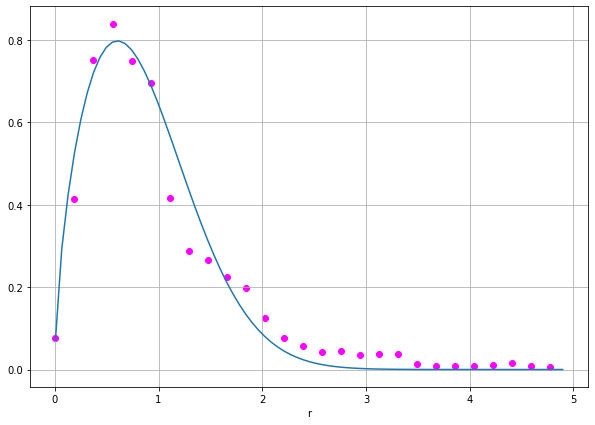

In [220]:
r = np.linspace(data_mv.min(), data_mv.max(), nExtractedSamples)

kde = KernelDensity(kernel='gaussian', bandwidth=0.07).fit(data_mv.values.reshape(-1, 1))
Xdata = r
logkde = kde.score_samples(Xdata)
Ydata = np.exp(logkde)

plt.figure(figsize=(10,7))
plt.scatter(Xdata[::3], Ydata[::3],c='magenta')
plt.plot(Xdata, computePDF(Xdata, 0.0100000000000427, 0.794245862021533, 0.984845555190635))
# plt.plot(Xdata, computePDF(Xdata, kappa_hat_rad, mu_hat_rad, omega_hat_rad))
# plt.ylabel('Density')
plt.xlabel('r')
plt.grid()
plt.show()

In [219]:
Xdata.shape

(81,)

In [218]:
fitnessType = 'MSE'
nMaxGen = 200
kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm(Xdata,Ydata)

TypeError: ignored

In [156]:
n = len(X)
K = 3

# AIC MLE
sum = np.sum(np.log(computePDF(data_mv, 0.0100000000000427, 0.794245862021533, 0.984845555190635)))
AIC_mle = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM - FITNESS: MSE
sum = np.sum(np.log(computePDF(data_mv, kappa_hat3, mu_hat3, omega_hat3)))
AIC_ga_mse = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)
  
# AIC GENETIC ALGORITHM - FITNESS: RAD
sum = np.sum(np.log(computePDF(data_mv, kappa_hat2, mu_hat2, omega_hat2)))
AIC_ga_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

In [158]:
AIC_mle

0    380915.064714
dtype: float64

In [132]:
AIC_ga_mse      

0    1.013956e+06
dtype: float64

In [29]:
n = len(X)
K = 3

# AIC MLE
sum = np.sum(np.log(computePDF(X, 60.074731198877520, 0.100000000000035, 1.090859130374765)))
AIC_mle = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM - FITNESS: MSE
sum = np.sum(np.log(computePDF(X, kappa_hat, mu_hat, omega_hat)))
AIC_ga_mse = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM - FITNESS: RAD
sum = np.sum(np.log(computePDF(X, kappa_hat2, mu_hat2, omega_hat2)))
AIC_ga_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

In [121]:
rads = {'Methods':['Genetic Algorithm (Fitness = MSE)', 'Genetic Algorithm (Fitness = RAD)', 'Maximum Likelihood Estimator'],
		'Resistor Average Distance':[rad_mse, rad_rad, rad_mle],
    'Akaike Information Criteria':[AIC_ga_mse, AIC_ga_rad, AIC_mle]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df)

,Methods,Resistor Average Distance,Akaike Information Criteria
0,Genetic Algorithm (Fitness = MSE),0.023555,0 1.013956e+06 dtype: float64
1,Genetic Algorithm (Fitness = RAD),0.013667,0 802648.340207 dtype: float64
2,Maximum Likelihood Estimator,0.023563,0 1.017799e+06 dtype: float64
